In [1]:
from cnp.data import EEGGenerator

import torch

import numpy as np
import matplotlib.pyplot as plt

from cnp.cnp import GaussianNeuralProcess
from cnp.cov import (
    MeanFieldGaussianLayer,
    InnerprodGaussianLayer,
    KvvGaussianLayer
)

In [2]:
train = EEGGenerator(split='train')

In [3]:
valid = EEGGenerator(split='validation')

In [4]:
test = EEGGenerator(split='test')

torch.Size([16, 256, 1])
torch.Size([16, 64, 256])
torch.Size([16, 100, 1])
torch.Size([16, 64, 100])


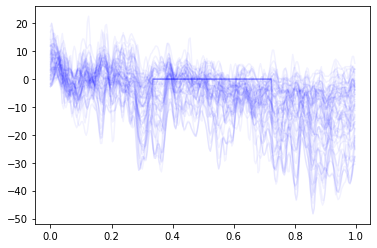

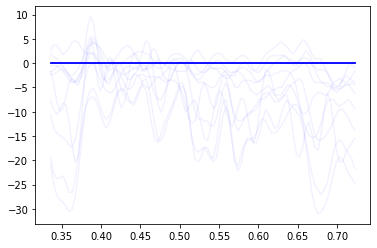

In [13]:
for batch in train:
    
    print(batch['x_context'].shape)
    print(batch['y_context'].shape)
    print(batch['x_target'].shape)
    print(batch['y_target'].shape)
    
    for x, y in zip(batch['x_context'], batch['y_context']):
        
        plt.plot(x[:, 0], y.T, color='blue', alpha=0.05)
        plt.show()
        
        break
    
    
    for x, y in zip(batch['x_target'], batch['y_target']):
        
        plt.plot(x[:, 0], y.T, color='blue', alpha=0.05)
        plt.show()
        
        break
        
    break

In [ ]:
a = batch['x'][5, 0, 1:] - batch['x'][5, 0, :-1]
a = a - a[0]
torch.sum(a)

In [ ]:
# φ(x - 0)
#
# (-1, -1), ( 0, -1), ( 1, -1)
# (-1,  0), ( 0,  0), ( 1,  0)
# (-1,  1), ( 0,  1), ( 1,  1)
#
# φ00, φ01, φ02
# φ10, φ11, φ12
# φ20, φ21, φ22

In [ ]:
B = 20
T = 128
K = 5
C = 8

w = torch.rand(5, 8, 16)
b = torch.rand(5)
x = torch.rand(B, C, T)

torch.nn.functional.conv1d(x, w, bias=b, stride=1, padding=0, dilation=1, groups=1).shape

In [ ]:
import torch
from torch import nn

In [ ]:
class PositiveConv1D(nn.Module):
    
    def __init__(self,
                 in_channels,
                 out_channels,
                 kernel_size,
                 padding,
                 stride):
        
        super().__init__()
        
        self._weights = torch.randn(out_channels, in_channels, kernel_size)
        self._weights = self._weights - torch.log(torch.sum(torch.exp(self._weights), dim=-1)[..., None])
        self._weights = nn.Parameter(self._weights)
        
        self.padding = padding
        self.stride = stride
    
    def weights(self):
        return torch.exp(self._weights)
    
    def forward(self, tensor):
        
        tensor = torch.nn.functional.conv1d(tensor,
                                            self.weights(),
                                            bias=None,
                                            stride=self.stride,
                                            padding=self.padding,
                                            dilation=1,
                                            groups=1)
        
        return tensor

In [ ]:
in_channels = 4
out_channels = 8
kernel_size = 3
padding = kernel_size // 2
stride = 1

B = 20
T = 128

x = torch.randn(B, in_channels, T)

conv1d = PositiveConv1D(in_channels=in_channels,
                        out_channels=out_channels,
                        kernel_size=kernel_size,
                        padding=padding,
                        stride=stride)

conv1d(x).shape

plt.plot(x[0, 0, :].detach().numpy())
plt.plot(conv1d(x)[0, 0, :].detach().numpy())
plt.show()